In [28]:
!pip install vaderSentiment
!pip install transformers
!pip install fasttext
!pip install nltk gensim pyLDAvis
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
%matplotlib inline
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from os import path
from transformers import pipeline
import fasttext
import plotly.express as px
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_wc = pd.read_csv("/content/drive/MyDrive/west_coast_clean1.csv")
df_ec = pd.read_csv('/content/drive/MyDrive/east_coast_clean1.csv')
df_mw = pd.read_csv('/content/drive/MyDrive/mid_west_clean1.csv')

In [7]:
df = pd.concat([df_wc, df_ec, df_mw], ignore_index=True)
df.describe()
df['year'] = df['converted_date'].str.split('-').str[-1].astype(int)

In [8]:
p=[]
s=[]
for i in df['article']:
  testimonial=TextBlob(i)
  p.append(testimonial.sentiment.polarity)
  s.append(testimonial.sentiment.subjectivity)
df['Polarity']=p
df['Subjectivity']=s

In [9]:
df.head()

,title,article,news_source,region,converted_date,year,Polarity,Subjectivity
0,Commentary: Driving an EV does not make you p...,started driving electric vehicle 2018 became p...,latimes,west-coast,09-17-2022,2022,0.094551,0.487932
1,Op-Ed: Think bigger. Switching to electric ca...,might feel like easy solution replace gasguzzl...,latimes,west-coast,09-15-2022,2022,-0.038585,0.418621
2,Editorial: EPA wants to speed up EV switch. G...,biden administration proposed hitting accelera...,latimes,west-coast,04-12-2023,2023,0.065440,0.477228
3,"California’s electric car revolution, designe...",precious cargo ship docked san diego bay strik...,latimes,west-coast,07-21-2021,2021,0.086797,0.435087
4,Electric cars now make up a fifth of Californ...,one every 5 cars sold california powered batte...,latimes,west-coast,11-01-2023,2023,0.118097,0.284825


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

def print_sentiment_result(sentiment_label, sentiment_scores):
    print(f"Positivity: {sentiment_scores['pos'] * 100}%")
    print(f"Negativity: {sentiment_scores['neg'] * 100}%")
    print(f"Neutrality: {sentiment_scores['neu'] * 100}%")

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd  # Assuming you are using pandas for your DataFrame

def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

Positivity = []
Negativity = []
Neutrality = []
Compound_score = []

# Assuming 'df' is your DataFrame and 'article' is the column containing news articles
for article in df['article']:
    sentiment_scores = analyze_sentiment(article)
    Positivity.append(sentiment_scores['pos'] * 100)
    Negativity.append(sentiment_scores['neg'] * 100)
    Neutrality.append(sentiment_scores['neu'] * 100)
    Compound_score.append((sentiment_scores['compound']+1)*50)

df['Positivity'] = Positivity
df['Negativity'] = Negativity
df['Neutrality'] = Neutrality
df['Compound_score'] = Compound_score


In [12]:
df.head()

,title,article,news_source,region,converted_date,year,Polarity,Subjectivity,Positivity,Negativity,Neutrality,Compound_score
0,Commentary: Driving an EV does not make you p...,started driving electric vehicle 2018 became p...,latimes,west-coast,09-17-2022,2022,0.094551,0.487932,17.3,10.7,72.0,99.055
1,Op-Ed: Think bigger. Switching to electric ca...,might feel like easy solution replace gasguzzl...,latimes,west-coast,09-15-2022,2022,-0.038585,0.418621,13.3,9.0,77.7,94.935
2,Editorial: EPA wants to speed up EV switch. G...,biden administration proposed hitting accelera...,latimes,west-coast,04-12-2023,2023,0.065440,0.477228,11.0,8.8,80.2,74.820
3,"California’s electric car revolution, designe...",precious cargo ship docked san diego bay strik...,latimes,west-coast,07-21-2021,2021,0.086797,0.435087,11.4,9.0,79.6,99.655
4,Electric cars now make up a fifth of Californ...,one every 5 cars sold california powered batte...,latimes,west-coast,11-01-2023,2023,0.118097,0.284825,11.6,7.4,81.0,93.290


In [14]:
fig = px.bar(df, x='news_source', y='Positivity',
             color='year',
             labels={'Positivity': 'Positivity', 'news_source': 'News Source'},
             title='Positivity Progress Over the Years',
             facet_col='year',  # Group by year
             width=1500, height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=40),  # Adjust margins as needed
)
fig.show()

In [15]:

fig = px.bar(df, x='year', y='Positivity',
             color='year',
             labels={'Positivity': 'Positivity', 'news_source': 'News Source'},
             title='Positivity Progress Over the Years',
             facet_col='news_source',  # Group by news_source
             facet_col_wrap=5,  # Display 5 columns
             width=1500, height=600)  # Adjust width as needed

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=40),  # Adjust margins as needed
)

fig.show()


In [16]:
fig = px.bar(df, x='year', y='Negativity',
             color='year',
             labels={'Negativity': 'Negativity', 'news_source': 'News Source'},
             title='Negativity Progress Over the Years',
             facet_col='news_source',  # Group by news_source
             facet_col_wrap=5,  # Display 5 columns
             width=1500, height=600)  # Adjust width as needed

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=40),  # Adjust margins as needed
)

fig.show()

In [18]:
fig = px.bar(df, x='year', y='Compound_score',
             color='year',
             labels={'Compound_score': 'Compound_score', 'news_source': 'News Source'},
             title='Aggregate Sentiment Over the Years',
             facet_col='news_source',  # Group by news_source
             facet_col_wrap=5,  # Display 5 columns
             width=1500, height=600)  # Adjust width as needed
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=40),  # Adjust margins as needed
)
fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning:

The following kwargs were not used by contour: 'linewidth'



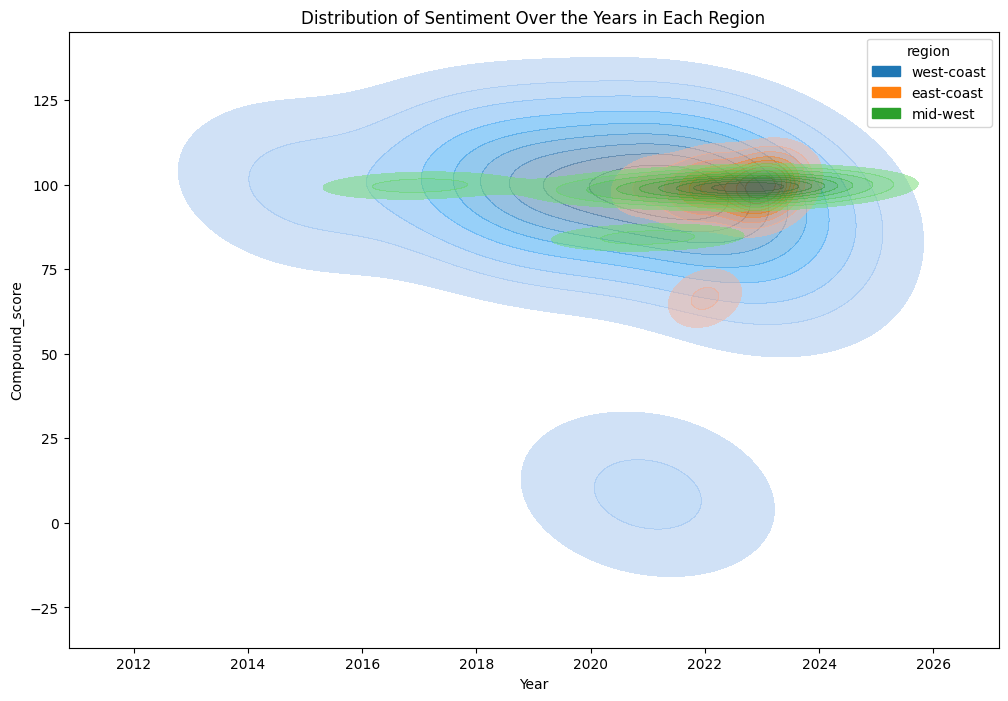

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: 'year', 'region', 'vscomp'

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create grouped bar plot
sns.kdeplot(data=df, x='year', y='Compound_score', hue='region', ax=ax,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)

# Set plot labels
ax.set_xlabel('Year')
ax.set_ylabel('Compound_score')
ax.set_title('Distribution of Sentiment Over the Years in Each Region')

# Show the plot
plt.show()


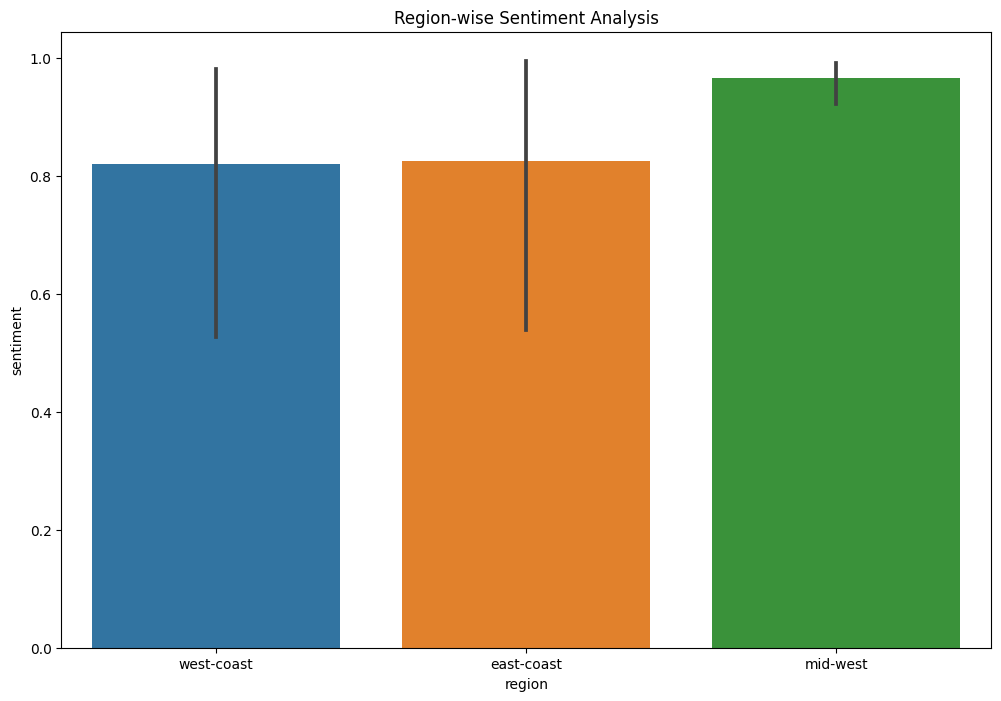

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Apply sentiment analysis to each article
df['sentiment'] = df['article'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Step 3: Region-wise Sentiment Analysis

# Plot region-wise sentiment
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='region', y='sentiment')
plt.title('Region-wise Sentiment Analysis')
plt.show()
sid = SentimentIntensityAnalyzer()




In [51]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel

# Assuming df is your DataFrame with columns: 'region', 'article'

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize, remove stopwords, and lemmatize
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

    return tokens

# Apply preprocessing to each article
df['processed_text'] = df['article'].apply(preprocess_text)

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

# Build an LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Extract topics for each document
df['topics'] = df['processed_text'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

region_topics = df.groupby('region')['topics'].sum()

# Display topics for each region
for region, topics in region_topics.items():
    print(f"Region: {region}")
    for topic_id, score in topics:
        print(f"Topic {topic_id + 1}: {lda_model.print_topic(topic_id)} (Score: {score:.4f})")
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Region: east-coast
Topic 1: 0.015*"electric" + 0.013*"car" + 0.013*"vehicle" + 0.010*"ev" + 0.008*"said" + 0.007*"new" + 0.007*"battery" + 0.006*"energy" + 0.006*"would" + 0.006*"state" (Score: 0.9990)
Topic 2: 0.020*"electric" + 0.016*"vehicle" + 0.016*"car" + 0.009*"emission" + 0.008*"said" + 0.008*"state" + 0.007*"ev" + 0.006*"would" + 0.006*"climate" + 0.006*"new" (Score: 0.9980)
Topic 1: 0.015*"electric" + 0.013*"car" + 0.013*"vehicle" + 0.010*"ev" + 0.008*"said" + 0.007*"new" + 0.007*"battery" + 0.006*"energy" + 0.006*"would" + 0.006*"state" (Score: 0.9993)
Topic 1: 0.015*"electric" + 0.013*"car" + 0.013*"vehicle" + 0.010*"ev" + 0.008*"said" + 0.007*"new" + 0.007*"battery" + 0.006*"energy" + 0.006*"would" + 0.006*"state" (Score: 0.9990)
Topic 1: 0.015*"electric" + 0.013*"car" + 0.013*"vehicle" + 0.010*"ev" + 0.008*"said" + 0.007*"new" + 0.007*"battery" + 0.006*"energy" + 0.006*"would" + 0.006*"state" (Score: 0.9988)
Topic 1: 0.015*"electric" + 0.013*"car" + 0.013*"vehicle" + 0.01